In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import networkx as nx
import time
from math import sqrt
import random
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
# Load dataset
df_data = pd.read_csv("/content/Updated_Speed_Limits_with_Duration.csv")

In [10]:
df_data

,start_node,end_node,paths,speed_limit_kph,distance_meters,duration_seconds,route,is_signed,is_blocked
0,"(40.817387, -73.925413)","(40.817501, -73.925585)",unnamed roads,25,20.1168,2.896819,ambulance entrance,emergency,0
1,"(40.817501, -73.925585)","(40.817980, -73.925216)",park avenue,30,60.9600,7.315200,street,oneway,0
2,"(40.817980, -73.925216)","(40.819259, -73.924069)",park avenue,30,160.9340,19.312080,street,oneway,0
3,"(40.819259, -73.924069)","(40.820560, -73.922594)",park avenue,30,160.9340,19.312080,street,oneway,0
4,"(40.820560, -73.922594)","(40.821551, -73.921220)",park avenue,30,160.9340,19.312080,street,oneway,0
...,...,...,...,...,...,...,...,...,...
111,"(40.822956, -73.914515)","(40.823472, -73.916221)",159th street,30,160.9340,19.312080,street,oneway,0
112,"(40.823595, -73.914186)","(40.824102, -73.915880)",160th street,30,160.9340,19.312080,street,oneway,0
113,"(40.824702, -73.915523)","(40.824207, -73.913844)",161st street,40,160.9340,14.484060,widestreet,twoway,0
114,"(40.824819, -73.913519)","(40.825219, -73.914749)",162nd street,30,113.0810,13.569720,street,oneway,0


In [11]:
# Drop unnecesarry columsn
df = df_data.drop(columns=['paths', 'route'])

In [12]:
df

,start_node,end_node,speed_limit_kph,distance_meters,duration_seconds,is_signed,is_blocked
0,"(40.817387, -73.925413)","(40.817501, -73.925585)",25,20.1168,2.896819,emergency,0
1,"(40.817501, -73.925585)","(40.817980, -73.925216)",30,60.9600,7.315200,oneway,0
2,"(40.817980, -73.925216)","(40.819259, -73.924069)",30,160.9340,19.312080,oneway,0
3,"(40.819259, -73.924069)","(40.820560, -73.922594)",30,160.9340,19.312080,oneway,0
4,"(40.820560, -73.922594)","(40.821551, -73.921220)",30,160.9340,19.312080,oneway,0
...,...,...,...,...,...,...,...
111,"(40.822956, -73.914515)","(40.823472, -73.916221)",30,160.9340,19.312080,oneway,0
112,"(40.823595, -73.914186)","(40.824102, -73.915880)",30,160.9340,19.312080,oneway,0
113,"(40.824702, -73.915523)","(40.824207, -73.913844)",40,160.9340,14.484060,twoway,0
114,"(40.824819, -73.913519)","(40.825219, -73.914749)",30,113.0810,13.569720,oneway,0


/tmp/ipython-input-4237917509.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='speed_limit_kph', palette='viridis')


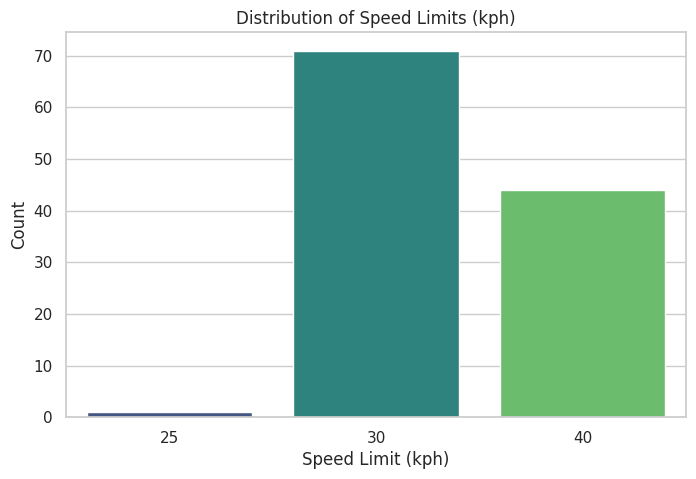

In [13]:
# Data Visualization
# Set style for plots
sns.set_theme(style="whitegrid")

# Speed Limit Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='speed_limit_kph', palette='viridis')
plt.title('Distribution of Speed Limits (kph)')
plt.xlabel('Speed Limit (kph)')
plt.ylabel('Count')
plt.show()

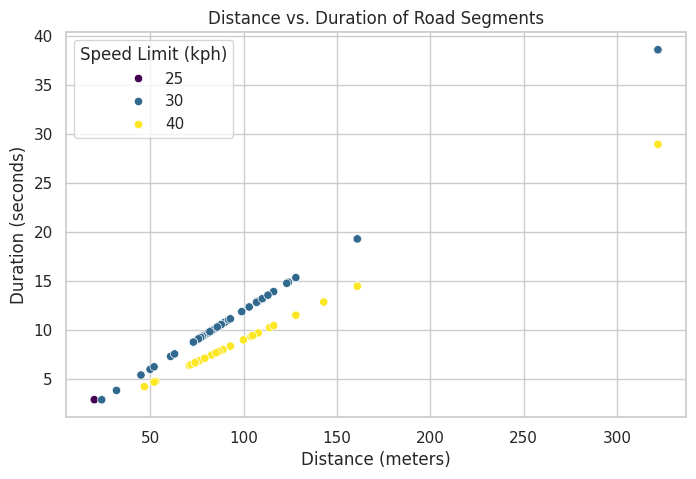

In [14]:
# Distance vs. Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='distance_meters', y='duration_seconds', hue='speed_limit_kph', palette='viridis')
plt.title('Distance vs. Duration of Road Segments')
plt.xlabel('Distance (meters)')
plt.ylabel('Duration (seconds)')
plt.legend(title='Speed Limit (kph)')
plt.show()

/tmp/ipython-input-2686387924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_signed', palette='viridis')


Text(0, 0.5, 'Count')

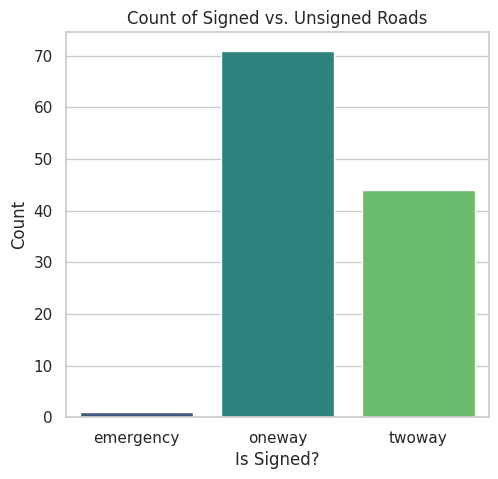

In [15]:
# Road Type Analysis (is_signed and is_blocked)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='is_signed', palette='viridis')
plt.title('Count of Signed vs. Unsigned Roads')
plt.xlabel('Is Signed?')
plt.ylabel('Count')

/tmp/ipython-input-3166851106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_blocked', palette='viridis')


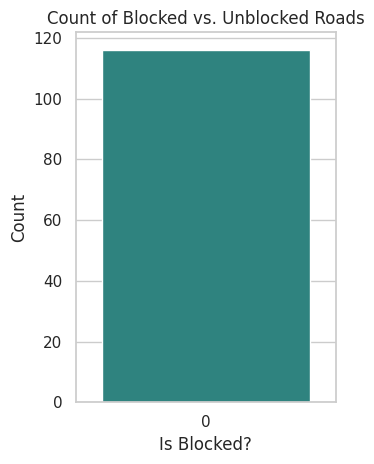

In [16]:
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='is_blocked', palette='viridis')
plt.title('Count of Blocked vs. Unblocked Roads')
plt.xlabel('Is Blocked?')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

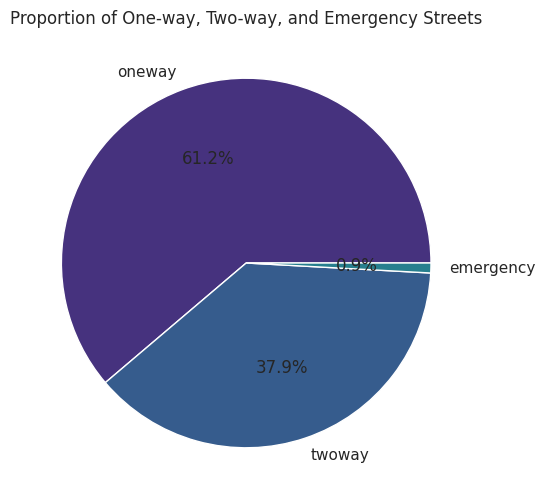

In [17]:
street_types = df['is_signed'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(street_types, labels=['oneway', 'twoway', 'emergency'], autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Proportion of One-way, Two-way, and Emergency Streets')
plt.show()

In [21]:
# Data splitting
df['cost'] = df['duration_seconds'] + (df['distance_meters']) + (df['is_blocked'] * 1000)

X = df.drop(columns=['duration_seconds', 'distance_meters', 'is_blocked', 'cost'])  # Features
y = df['cost']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print("Split successful!")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Split successful!
Training samples: 81
Test samples: 35
